# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Tita Nuril Istiqomah
- **Email:** titanuril1@gmail.com
- **ID Dicoding:** tita_nuril

## Menentukan Pertanyaan Bisnis

- Apa korelasi antara kecepatan angin dan hujan di kota Wanshaoxigong?
- Bagaimana kelembaban udara (DEWP) mempengaruhi temperatur di Kota Wanshaoxigong?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Wrangling

Data Wrangling merupakan proses pengumpulan data (Gathering data), penilaian data (Assessing data), dan pembersihan data (Cleaning data) sebelum melakukan proses analisis data.

### Gathering Data

Dalam tahap ini, saya akan mengumpulkan data yang dibutuhkan. Berdasarkan pertanyaan - pertanyaan yang telah saya buat, maka saya membutuhkan PRSA Data Wanshouxigong.

In [2]:
Data_Wanshouxigong = pd.read_csv("https://drive.google.com/uc?export=download&id=19r76RLV12_hCv96BFbOpYstbKhTOO1WB")
Data_Wanshouxigong.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- Terdapat data yang bernilai NaN

### Assessing Data
Pada tahap ini, akan dilakukan penilaian kualitas data yang akan digunakan. Data yang akan dinilai yaitu data kualitas udara di Kota Wanshouxigong.

In [3]:
#memeriksa tipe data dan jumlah data dari setiap kolom
Data_Wanshouxigong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Tidak ada masalah pada tipe data
- Terdapat missing value pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan, WSPM.
- Terdapat 18 kolom dan 35064 baris

In [4]:
#memeriksa jumlah missing value
Data_Wanshouxigong.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,696
PM10,484
SO2,669
NO2,754
CO,1297


**Insight**
Pada tahap ini, saya menemukan banyak missing value pada kolom PM2.5, PM 10, SO2, NO2, CO, O3, TEMP, DEWP, RAIN, wd, dan WSPM.

In [5]:
#memeriksa jumlah duplikasi
print("jumlah duplikasi : ", Data_Wanshouxigong.duplicated().sum())

jumlah duplikasi :  0


**Insight**
- Setelah memeriksa duplikasi, didapatkan tidak ada duplikasi dari data yang digunakan.

In [6]:
#memeriksa parameter statistik
Data_Wanshouxigong.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


**Insight**
- Pada data di atas, contohnya kolom PM2.5 menunjukkan bahwa rata - rata polusi PM2.5 adalah 85.024136


### Cleaning Data
Setelah melakukan assessing data, ditemukan permasalahan yaitu missing value. Missing value akan diatasi pada tahap cleaning data.

In [7]:
#Menghapus kolom data yang tidak dibutuhkan
Data_Wanshouxigong.drop(columns=['No', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'PRES','wd', 'station'], inplace=True)

In [8]:
#Menampilkan 5 baris pertama
Data_Wanshouxigong.head()

,year,month,day,hour,TEMP,DEWP,RAIN,WSPM
0,2013,3,1,0,0.3,-19.0,0.0,2.0
1,2013,3,1,1,-0.1,-19.3,0.0,4.4
2,2013,3,1,2,-0.6,-19.7,0.0,4.7
3,2013,3,1,3,-0.7,-20.9,0.0,2.6
4,2013,3,1,4,-0.9,-21.7,0.0,2.5


In [9]:
#Mengatasi missing value dengan Imputation
columns_to_fill = [ 'DEWP', 'TEMP', 'RAIN', 'WSPM']

for column in columns_to_fill:
    # Memastikan kolom numerik, karena metode rata-rata hanya relevan untuk angka
    if Data_Wanshouxigong[column].dtype != 'object':
        mean_value = Data_Wanshouxigong[column].mean()
        Data_Wanshouxigong[column].fillna(mean_value, inplace=True)
    else:
        print(f"Skipping column '{column}' as it is not numeric.")


<ipython-input-9-4377749033c6>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data_Wanshouxigong[column].fillna(mean_value, inplace=True)


In [10]:
#Jumlah missing value setelah mengatasi dengan metode imputation
Data_Wanshouxigong.isna().sum()

,0
year,0
month,0
day,0
hour,0
TEMP,0
DEWP,0
RAIN,0
WSPM,0


**Insight**
- Setelah metode imputation dijalankan, terlihat bahwa tidak ditemukan missing value

In [11]:
Data_Wanshouxigong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   TEMP    35064 non-null  float64
 5   DEWP    35064 non-null  float64
 6   RAIN    35064 non-null  float64
 7   WSPM    35064 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 2.1 MB


**Insight:**
- Tidak ada masalah dengn tipe data
- Sudah tidak ada missing value

## Exploratory Data Analysis (EDA)

### Explore ...

Mendefinisikan Pertanyaan
1. Apa korelasi antara kecepatan angin dan hujan di Kota Wanshouxigong?
2. Bagiaman kelembaban (DEWP) mempengaruhi suhu udara di Kota Wanshouxigong?

In [12]:
#Eksplorasi Data
Data_Wanshouxigong.describe(include="all")

,year,month,day,hour,TEMP,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2014.662560,6.522930,15.729637,11.500000,13.784477,2.707442,0.064320,1.745314
std,1.177213,3.448752,8.800218,6.922285,11.382071,13.700426,0.796765,1.206131
min,2013.000000,1.000000,1.000000,0.000000,-16.800000,-35.300000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,3.400000,-8.500000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,14.700000,3.300000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,23.500000,15.200000,0.000000,2.300000
max,2017.000000,12.000000,31.000000,23.000000,40.600000,28.500000,46.400000,13.200000


**Insight:**
- Dapat dilihat dari setiap kolom, nilai standar deviasinya cenderung rendah. Hal ini berarti datanya tidak terlalu bervariasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Apa korelasi antara kecepatan angin (WSPM) dengan hujan (RAIN) Kota Wanshouxigong?

In [13]:
#Mengelompokkan data WSPM dan RAIN
Data_Wanshouxigong.groupby(by="day").agg({
    "WSPM" : ["mean"],
    "RAIN" : ["mean"]
})

,WSPM,RAIN
,mean,mean
day,,
1,1.700955,0.118576
2,1.726562,0.066927
3,1.880642,0.001563
4,1.758767,0.099132
5,1.793663,0.032118
6,1.581684,0.075087
7,1.711979,0.128993
8,1.898872,0.043663


**Insight**
- key yang digunakan yaitu hari
- paraemter statistik yang digabungkan yaitu WSPM dan RAIN berdasarkan nilai rata - ratanya.

In [14]:
#Menghitung korelasi antara WSPM dan RAIN dengan metode Pearson
WSPM_RAIN_pearson = Data_Wanshouxigong['WSPM'].corr(Data_Wanshouxigong['RAIN'], method='pearson')
print(f'Korelasi antara WSPM dan RAIN : {WSPM_RAIN_pearson}')

Korelasi antara WSPM dan RAIN : 0.030898121591487703


In [15]:
#Menghitung korelasi antara WSPM dan RAIN dengan metode Spearman
WSPM_RAIN_spearman = Data_Wanshouxigong['WSPM'].corr(Data_Wanshouxigong['RAIN'], method='spearman')
print(f'Korelasi antara WSPM dan RAIN dengan metode spearman : {WSPM_RAIN_spearman}')

Korelasi antara WSPM dan RAIN dengan metode spearman : 0.0004755398140478686


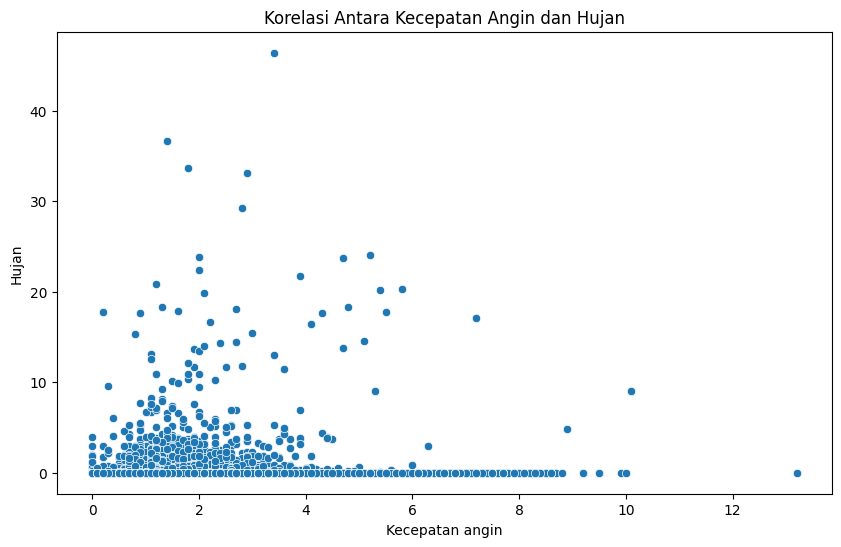

In [16]:
#Membuat Scatterplot untuk melihat sebaran data
plt.figure(figsize=(10,6))
sns.scatterplot(x="WSPM", y="RAIN", data=Data_Wanshouxigong)
plt.title('Korelasi Antara Kecepatan Angin dan Hujan')
plt.xlabel('Kecepatan angin')
plt.ylabel('Hujan')
plt.show()

**Insight**
- Metode Pearson dan Spearman digunakan untuk mengukur korelasi antara dua variabel.
- Nilai korelasi kecepatan angin dan hujan dengan Metode Pearson bernilai 0.03. Artinya, ada korelasi antara kecepatan angin dan hujan tetapi, korelasinya lemah.
- Nilai korelasi kecepatan angin dan hujan dengan Metode Spearman bernilai 0.0004. Artinya, hampir tidak ada korelasi antara kecepatan angin dan hujan.

### Pertanyaan 2:
Bagaimana kelembaban udara (DEWP) mempengaruhi suhu udara (TEMP)?

In [17]:
#Mengelompokkan data kelembaban (DEWP) dan suhu udara (TEMP)
Data_Wanshouxigong.groupby(by='day').agg({
    'DEWP' : ['mean'],
    'TEMP' : ['mean']
})

,DEWP,TEMP
,mean,mean
day,,
1,2.884722,13.655122
2,2.496962,13.745970
3,2.023264,14.274913
4,2.584896,13.744850
5,2.668142,14.054427
6,2.400174,13.515061
7,3.049392,13.763397
8,1.930729,13.471925


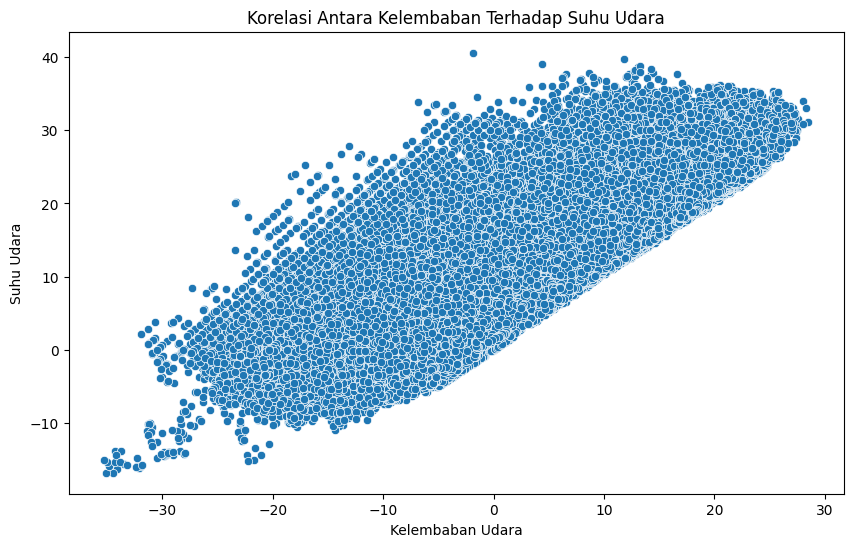

In [18]:
#Sccater plot melihat sebaran data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DEWP', y='TEMP', data=Data_Wanshouxigong)
plt.title('Korelasi Antara Kelembaban Terhadap Suhu Udara')
plt.xlabel('Kelembaban Udara')
plt.ylabel('Suhu Udara')
plt.show()

In [19]:
#Menghitung korelasi dengan Metode Spearman
spearman_DEWP_TEMP = Data_Wanshouxigong['DEWP'].corr(Data_Wanshouxigong['TEMP'], method='spearman')
print(f'Korelasi antara Kelembaban dan Suhu Udara dengan Metode Spearman : {spearman_DEWP_TEMP:.3f}')

Korelasi antara Kelembaban dan Suhu Udara dengan Metode Spearman : 0.815


In [20]:
#Menghitung korelasi dengan Metode Pearson
pearson_DEWP_TEMP = Data_Wanshouxigong['DEWP'].corr(Data_Wanshouxigong['TEMP'], method='pearson')
print(f'Korelasi antara Kelembaban dan Suhu Udara dengan Metode Pearson : {pearson_DEWP_TEMP:.3f}')

Korelasi antara Kelembaban dan Suhu Udara dengan Metode Pearson : 0.817


**Insight:**
- Berdasarkan scatterplot, kelembaban berpengaruh terhadap suu udara. Hal ini didukung dengan hasil analisis korelasi dengan metode spearman dan pearson yang menunjukkan nilai korelasinya 0.815 dan 0.817. Nilai korelasinya mendekati satu yang berarti korelasinya kuat.

## Conclusion

- Berdasarkan visualisasi data dengan scatterplot, terdapat korelasi antara kecepatan angin dan hujan. Tetapi, berdasarkan metode pearson dan spearman, korelasinya lemah.
- Berdasarkan visualisasi data dengan scatterplot, menunjukkan bahwa terdapat korelasi antara kelembaban (DEWP) dengan suhu udara (TEMP). Selain itu, dengan menggunakan metode pearson dan spearman, korelasi antara keduanya menghasilkan angka positif yaitu 0.815 dan 0.817. Angka ini mendekati angka 1 yang artinya ada hubungan atau korelasi kuat antara kelembaban  (DEWP) dengan suhu udara (TEMP).

In [21]:
Data_Wanshouxigong.to_csv("all_data.csv", index=False)